# Задание 1

Реализуйте стохастический градиентный спуск для решения линейной регрессии. Исследуйте сходимость с разным размером батча (1 - SGD, 2, $\ldots$, $n - 1$ - Minibatch GD, $n$ - GD из предыдущей работы).

In [2]:
import sys
sys.path.append('../')

In [3]:
import random
from helper import *

def stochastic_gradient_descent(f, initial_point, learning_rate=0.1, max_epochs=1000, minimum = 0.0, epsilon=1e-5, batch_size=1, apply_min=False):
    """
    Cтохастический градиентный спуск для поиска минимума функции.

    Аргументы:
        f (function): Изначальная функция.
        grad_fn (function): Функция, которая принимает точку и возвращает градиент в этой точке.
        initial_point (list): Начальную точка, с которой начинается поиск.
        learning_rate (float): Скорость обучения или шаг градиентного спуска.
        max_epochs (int): Максимальное количество эпох или итераций для выполнения алгоритма.
        minimum (float): Минимум функции.
        epsilon (float): Малое число, используемое как критерий останова для алгоритма.
        batch_size (int): кол-во координат по которым вычисляется градиент
    Возвращает:
        Кортеж, содержащий найденную минимальную точку, значение функции в этой точке и список всех точек, посещенных во время алгоритма.
    """

    batch_size = min(batch_size, len(initial_point))

    current_point = initial_point.copy() # текущая точка, инициализируется начальной точкой
    current_value = f(current_point) # значение функции в текущей точке
    visited_points = [current_point.copy()] # список посещенных точек, начинается с начальной точки
    for _ in range(max_epochs): # цикл по эпохам
        if abs(current_value - minimum) < epsilon: # если достигнуто достаточно малое значение функции, то останавливаемся
            break
        prev_point = np.copy(current_point) 
        for _ in range(batch_size):
            random_index = random.randint(0, len(current_point)-1) # выбираем случайный индекс измерения
            gradient_random_index = fast_gradient(f, current_point, random_index) # вычисляем градиент в текущей точке в случайном индексе
            current_point[random_index] -= learning_rate * gradient_random_index # обновляем текущую точку

        new_value = f(current_point) # вычисляем значение функции в обновленной точке
        if new_value < current_value: # если значение функции в обновленной точке меньше, чем в предыдущей, то продолжаем движение
            current_value = new_value
        else: # если значение функции больше или не изменилось, то возвращаемся к предыдущей точке
            current_point = prev_point
        visited_points.append(current_point.copy()) # добавляем текущую точку в список посещенных
    return current_point, current_value, visited_points # возвращаем результат работы функции

In [4]:
def linear_regression(file_info, epsilon=1e-5, learning_rate=0.01, max_epochs=1000, apply_min=False):
    X = file_info.X
    y = file_info.y
    a = file_info.real_weight
    b = file_info.real_bias

    def mse_loss(x):
        weights, bias = x[0], x[1]
        y_pred = np.dot(X, weights) + bias
        mse = np.mean((y - y_pred) ** 2)
        return mse
    
    def mae_loss(x):
        weights, bias = x[0], x[1]
        y_pred = np.dot(X, weights) + bias
        mae = np.mean(np.abs(y - y_pred))
        return mae
    
    def huber_loss(x, delta=1):
        weights, bias = x[0], x[1]
        y_pred = np.dot(X, weights) + bias
        residual = y - y_pred
        huber = np.where(np.abs(residual) < delta, 0.5 * residual ** 2, delta * (np.abs(residual) - 0.5 * delta))
        return np.mean(huber)
    
    def log_cosh_loss(x):
        weights, bias = x[0], x[1]
        y_pred = np.dot(X, weights) + bias
        residual = y - y_pred
        log_cosh = np.log(np.cosh(residual))
        return np.mean(log_cosh)
    
    def quantile_loss(x, q=0.5):
        weights, bias = x[0], x[1]
        y_pred = np.dot(X, weights) + bias
        residual = y - y_pred
        quantile = np.where(residual >= 0, q * residual, (q - 1) * residual)
        return np.mean(quantile)


    f = [mse_loss, mae_loss, huber_loss, log_cosh_loss, quantile_loss]
    labels = ['mse_loss', 'mae_loss', 'huber_loss', 'log_cosh_loss', 'quantile_loss']

    file_info.labels_loss = labels

    weight = 0
    bias = 0

    x0 = np.array([weight, bias], dtype=float)

    results = []
    count = []
    loss_history = []
    loss_real = []
    
    for i in range(len(f)):
        point, value, result = stochastic_gradient_descent(f[i], x0, epsilon=epsilon, learning_rate=learning_rate, max_epochs=max_epochs, batch_size=2, apply_min=apply_min)
        results.append(result)
        count.append(len(result))
        loss_history.append([f[i](point) for point in result])
        loss_real.append(f[i]([a, b]))
    return results, count, loss_history, loss_real, labels


Коэффициенты уравнения прямой:
y = 2.000 * x + -1.000
Вычисленные коэффициенты уравнения прямой Mini-batch mse_loss 1001:
y = 1.986 * x + -0.992
Вычисленные коэффициенты уравнения прямой Mini-batch mae_loss 1001:
y = 1.988 * x + -0.995
Вычисленные коэффициенты уравнения прямой Mini-batch huber_loss 1001:
y = 1.983 * x + -0.991
Вычисленные коэффициенты уравнения прямой Mini-batch log_cosh_loss 1001:
y = 1.983 * x + -0.990
Вычисленные коэффициенты уравнения прямой Mini-batch quantile_loss 1001:
y = 1.988 * x + -0.995


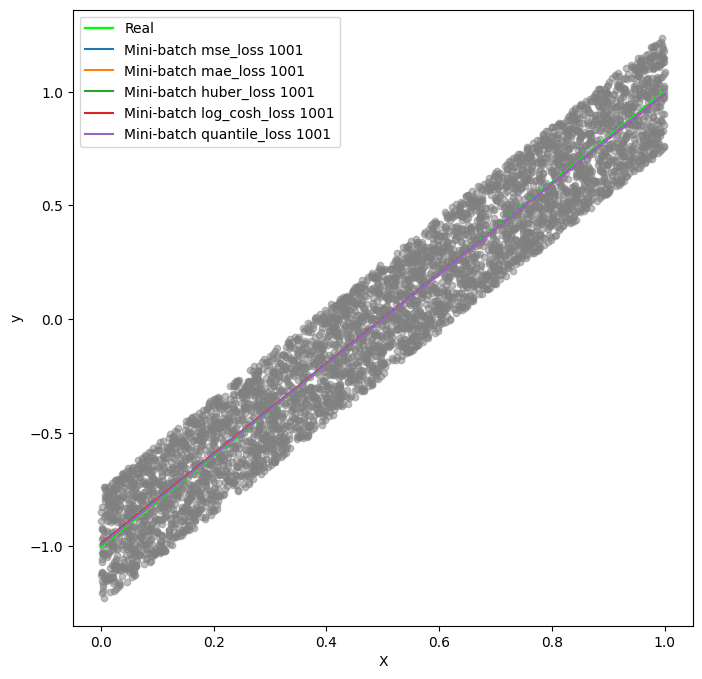

Значение функции потерь:
real = 0.02118388582531901
mse_loss = 0.021165771359874016
diff mse_loss - real = -1.8114465444994676e-05

Значение функции потерь:
real = 0.12655330875727527
mae_loss = 0.12652240661670305
diff mae_loss - real = -3.090214057221985e-05

Значение функции потерь:
real = 0.010591942912659505
huber_loss = 0.010583124030065078
diff huber_loss - real = -8.818882594427077e-06

Значение функции потерь:
real = 0.010526622427864396
log_cosh_loss = 0.010517993308388986
diff log_cosh_loss - real = -8.62911947541005e-06

Значение функции потерь:
real = 0.06327665437863764
quantile_loss = 0.06326120323859467
diff quantile_loss - real = -1.5451140042962996e-05



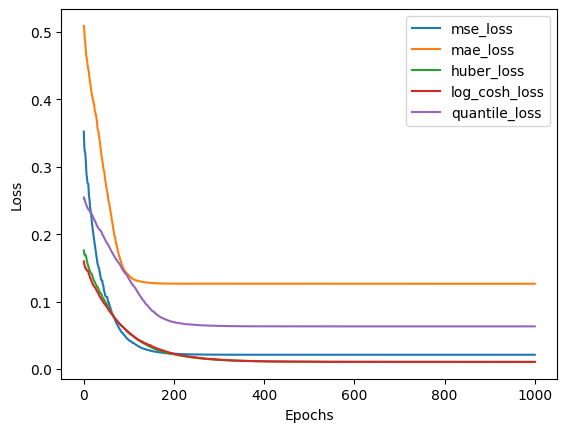

In [9]:
f_info = file_info_2d_data(2, -1, dots_count=5000, variance=0.25)

result, count, loss_history, loss_real, labels_loss = linear_regression(f_info, epsilon=0.0085, learning_rate = 0.1, max_epochs=1000, apply_min=True) 

print_2d_data(f_info, [result], ['Mini-batch'], show_print=True)
print_loss(loss_history, loss_real, labels_loss)
print_2d_function(loss_history, labels_loss)